In [1]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Payment Plan Data

In [2]:
payment_plan = pd.read_excel('Payment Plan.xlsx')
payment_plan.head()

,Created At Date,Payment Plan Name,Product Sub Category,Product Type,Currency Name,Product Price,Deposit,Daily Top Up,Loan Duration,Total Top Ups,Brand,Masterbrand,Model,Plan Type,Product Category,Variant,Mart Payment Plan ID,Payment Plan Status
0,2023-04-20,"MK 600 24"" TV v21 Staff",M-KOPA 600,Solar TV,KES,64199,2999.0,90.0,680.0,61200.0,M-KOPA,Solar,M-KOPA 600,Acquisition,MK TV,"24"" TV",4319,Active
1,2023-04-20,"MK 6000C 32"" TV v3 Staff",M-KOPA 6000,Solar TV,KES,86499,6499.0,100.0,800.0,80000.0,M-KOPA,Solar,M-KOPA 6000,Acquisition,MK TV,"32"" TV",4318,New
2,2023-02-08,"MK 600 24"" TV v24 Non-Locking HRA",M-KOPA 600,Solar TV,KES,81999,5999.0,100.0,760.0,76000.0,M-KOPA,Solar,M-KOPA 600,Acquisition,MK TV,"24"" TV",4077,Closed
3,2023-02-08,MK 6 v11 HRA,M-KOPA 6,Lights,KES,23999,999.0,50.0,460.0,23000.0,M-KOPA,Solar,M-KOPA 6,Acquisition,MK Classic,4 lights,4088,Active
4,2023-02-08,"MK 6000 32"" TV v24 Non Locking HRA",M-KOPA 6000,Solar TV,KES,116199,6999.0,130.0,840.0,109200.0,M-KOPA,Solar,M-KOPA 6000,Acquisition,MK TV,"32"" TV",4102,Closed


In [3]:
payment_plan.shape

(488, 18)

In [4]:
payment_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Created At Date       488 non-null    datetime64[ns]
 1   Payment Plan Name     488 non-null    object        
 2   Product Sub Category  488 non-null    object        
 3   Product Type          488 non-null    object        
 4   Currency Name         488 non-null    object        
 5   Product Price         488 non-null    int64         
 6   Deposit               477 non-null    float64       
 7   Daily Top Up          477 non-null    float64       
 8   Loan Duration         477 non-null    float64       
 9   Total Top Ups         477 non-null    float64       
 10  Brand                 488 non-null    object        
 11  Masterbrand           488 non-null    object        
 12  Model                 484 non-null    object        
 13  Plan Type           

<b>Data Cleaning and Preparation</b>

In [5]:
payment_plan.isnull().sum()

Created At Date          0
Payment Plan Name        0
Product Sub Category     0
Product Type             0
Currency Name            0
Product Price            0
Deposit                 11
Daily Top Up            11
Loan Duration           11
Total Top Ups           11
Brand                    0
Masterbrand              0
Model                    4
Plan Type                0
Product Category         0
Variant                  1
Mart Payment Plan ID     0
Payment Plan Status      0
dtype: int64

In [6]:
#Convert date column data type to datetime
payment_plan['Created At Date'] = pd.to_datetime(payment_plan['Created At Date'])

<b>Dealing with missing Values</b>

<b>The Model Column</b>

In [7]:
payment_plan.head()

,Created At Date,Payment Plan Name,Product Sub Category,Product Type,Currency Name,Product Price,Deposit,Daily Top Up,Loan Duration,Total Top Ups,Brand,Masterbrand,Model,Plan Type,Product Category,Variant,Mart Payment Plan ID,Payment Plan Status
0,2023-04-20,"MK 600 24"" TV v21 Staff",M-KOPA 600,Solar TV,KES,64199,2999.0,90.0,680.0,61200.0,M-KOPA,Solar,M-KOPA 600,Acquisition,MK TV,"24"" TV",4319,Active
1,2023-04-20,"MK 6000C 32"" TV v3 Staff",M-KOPA 6000,Solar TV,KES,86499,6499.0,100.0,800.0,80000.0,M-KOPA,Solar,M-KOPA 6000,Acquisition,MK TV,"32"" TV",4318,New
2,2023-02-08,"MK 600 24"" TV v24 Non-Locking HRA",M-KOPA 600,Solar TV,KES,81999,5999.0,100.0,760.0,76000.0,M-KOPA,Solar,M-KOPA 600,Acquisition,MK TV,"24"" TV",4077,Closed
3,2023-02-08,MK 6 v11 HRA,M-KOPA 6,Lights,KES,23999,999.0,50.0,460.0,23000.0,M-KOPA,Solar,M-KOPA 6,Acquisition,MK Classic,4 lights,4088,Active
4,2023-02-08,"MK 6000 32"" TV v24 Non Locking HRA",M-KOPA 6000,Solar TV,KES,116199,6999.0,130.0,840.0,109200.0,M-KOPA,Solar,M-KOPA 6000,Acquisition,MK TV,"32"" TV",4102,Closed


From the above sample dataframe, we can see that Values in the "Product Sub Category" column are the same as those in the "Model Column." So, I am going to have to replace the null values in the "model" column with non-values from the "Product Sub Category" column

In [8]:
#A look at null values in the Model column
payment_plan[payment_plan['Model'].isnull()]

,Created At Date,Payment Plan Name,Product Sub Category,Product Type,Currency Name,Product Price,Deposit,Daily Top Up,Loan Duration,Total Top Ups,Brand,Masterbrand,Model,Plan Type,Product Category,Variant,Mart Payment Plan ID,Payment Plan Status
290,2018-07-01,M-KOPA 4S Upgrade Pack v3,Starter Upgrade Pack,Radio and Torch,KES,10999,999.0,50.00,200.0,10000.0,M-KOPA,Solar,NaN,Upgrade,Addition,4 lights,843,Closed
375,2017-08-20,M-KOPA 4S Upgrade Pack v2,Starter Upgrade Pack,Radio and Torch,KES,10000,1500.0,50.00,170.0,8500.0,M-KOPA,Solar,NaN,Upgrade,Addition,4 lights,507,Closed
400,2017-06-09,M-KOPA 4S Upgrade Pack v1,Starter Upgrade Pack,Radio and Torch,KES,11500,1500.0,50.00,200.0,10000.0,M-KOPA,Solar,NaN,Upgrade,Addition,4 lights,428,Closed
445,2016-10-13,M-KOPA 4 Starter Upgrade Pack,Starter Upgrade Pack,Radio and Torch,KES,2000,0.0,5.48,365.0,2000.0,M-KOPA,Solar,NaN,Upgrade,Addition,4 lights,198,Active


In [9]:
# Replace missing values in the "Model" column with values from the "Product Sub Subcategory" column
mask = payment_plan['Product Sub Category'].notnull()
payment_plan.loc[mask, 'Model'] = payment_plan.loc[mask, 'Product Sub Category']

In [10]:
#Checking the output
filtered_df = payment_plan[payment_plan.index == 445]
filtered_df

,Created At Date,Payment Plan Name,Product Sub Category,Product Type,Currency Name,Product Price,Deposit,Daily Top Up,Loan Duration,Total Top Ups,Brand,Masterbrand,Model,Plan Type,Product Category,Variant,Mart Payment Plan ID,Payment Plan Status
445,2016-10-13,M-KOPA 4 Starter Upgrade Pack,Starter Upgrade Pack,Radio and Torch,KES,2000,0.0,5.48,365.0,2000.0,M-KOPA,Solar,Starter Upgrade Pack,Upgrade,Addition,4 lights,198,Active


<b>The "Variant" Column</b>

In [11]:
#Checking for null values in the Variant Column
payment_plan[payment_plan['Variant'].isnull()]

,Created At Date,Payment Plan Name,Product Sub Category,Product Type,Currency Name,Product Price,Deposit,Daily Top Up,Loan Duration,Total Top Ups,Brand,Masterbrand,Model,Plan Type,Product Category,Variant,Mart Payment Plan ID,Payment Plan Status
26,2022-07-01,"MK +600 24"" TV v18",M-KOPA +600,Solar TV,KES,72999,999.0,80.0,900.0,72000.0,M-KOPA,Solar,M-KOPA +600,Upgrade,MK TV,NaN,3130,Closed


We can also see that some of the variant values can be extracted from the "Payment Plan Column" especially with regards to Solar TV products.

In [12]:
payment_plan['Variant'].fillna("24\" TV", inplace=True)

In [13]:
#Checking the output
filtered_df = payment_plan[payment_plan.index == 26]
filtered_df

,Created At Date,Payment Plan Name,Product Sub Category,Product Type,Currency Name,Product Price,Deposit,Daily Top Up,Loan Duration,Total Top Ups,Brand,Masterbrand,Model,Plan Type,Product Category,Variant,Mart Payment Plan ID,Payment Plan Status
26,2022-07-01,"MK +600 24"" TV v18",M-KOPA +600,Solar TV,KES,72999,999.0,80.0,900.0,72000.0,M-KOPA,Solar,M-KOPA +600,Upgrade,MK TV,"24"" TV",3130,Closed


In [14]:
#A look at null values in the Model column
payment_plan[payment_plan['Deposit'].isnull()]

,Created At Date,Payment Plan Name,Product Sub Category,Product Type,Currency Name,Product Price,Deposit,Daily Top Up,Loan Duration,Total Top Ups,Brand,Masterbrand,Model,Plan Type,Product Category,Variant,Mart Payment Plan ID,Payment Plan Status
433,2017-01-26,M-KOPA 400 (3B) Cash v1,M-KOPA 400,Solar TV,KES,44999,NaN,NaN,NaN,NaN,M-KOPA,Solar,M-KOPA 400,Acquisition,MK TV,"16"" TV",273,Closed
435,2017-01-26,M-KOPA 400 (3B) Cash v1,M-KOPA 400,Solar TV,KES,100,NaN,NaN,NaN,NaN,M-KOPA,Solar,M-KOPA 400,Acquisition,MK TV,"16"" TV",275,Closed
437,2017-01-13,"M-KOPA 4 (3B): 18,999 cash",M-KOPA 4,Lights,KES,18999,NaN,NaN,NaN,NaN,M-KOPA,Solar,M-KOPA 4,Acquisition,MK Classic,3 lights,269,Closed
439,2017-01-13,M-KOPA 4(3B) Cash v1,M-KOPA 4,Lights,KES,18999,NaN,NaN,NaN,NaN,M-KOPA,Solar,M-KOPA 4,Acquisition,MK Classic,3 lights,267,Closed
441,2017-01-13,M-KOPA 400 Cash v3,M-KOPA 400,Solar TV,KES,44999,NaN,NaN,NaN,NaN,M-KOPA,Solar,M-KOPA 400,Acquisition,MK TV,"16"" TV",266,Closed
458,2016-08-14,M-KOPA 400 IndCh Cash v1,M-KOPA 400,Solar TV,KES,44999,NaN,NaN,NaN,NaN,M-KOPA,Solar,M-KOPA 400,Acquisition,MK TV,"16"" TV",147,Closed
467,2016-05-26,M-KOPA 4 IndCh Cash v1,M-KOPA 4,Lights,KES,17750,NaN,NaN,NaN,NaN,M-KOPA,Solar,M-KOPA 4,Acquisition,MK Classic,3 lights,129,Closed
468,2016-04-19,M-KOPA 400 Cash v2,M-KOPA 400,Solar TV,KES,44999,NaN,NaN,NaN,NaN,M-KOPA,Solar,M-KOPA 400,Acquisition,MK TV,"16"" TV",119,Closed
472,2016-04-07,M-KOPA 400 Cash v1,M-KOPA 400,Solar TV,KES,44999,NaN,NaN,NaN,NaN,M-KOPA,Solar,M-KOPA 400,Acquisition,MK TV,"16"" TV",117,Closed
479,2016-01-14,M-KOPA 400 (K) Cash v1,M-KOPA 400,Solar TV,KES,44999,NaN,NaN,NaN,NaN,M-KOPA,Solar,M-KOPA 400,Acquisition,MK TV,"16"" TV",103,Closed


The Null values in the Deposit, Daily Top Up, Loan Duration and Total Top Ups columns all show closed in the Payment plan Status column which could mean that these products were paid for in full and in cash as shown by Cash in the Payment Plan Name column. Therefore, let's replace all these values with zero.

In [15]:
#Replacing the remaining null values with zero
payment_plan.fillna(0, inplace = True)
payment_plan.isnull().sum()

Created At Date         0
Payment Plan Name       0
Product Sub Category    0
Product Type            0
Currency Name           0
Product Price           0
Deposit                 0
Daily Top Up            0
Loan Duration           0
Total Top Ups           0
Brand                   0
Masterbrand             0
Model                   0
Plan Type               0
Product Category        0
Variant                 0
Mart Payment Plan ID    0
Payment Plan Status     0
dtype: int64

We have no Null / Missing values therefore our dataset is clean

<b>Exploratory Data Analysis</b>

In [16]:
payment_plan.describe()

,Created At Date,Product Price,Deposit,Daily Top Up,Loan Duration,Total Top Ups,Mart Payment Plan ID
count,488,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,2019-01-24 02:06:53.114754048,58292.346311,4459.721311,88.095246,582.579918,53128.543033,1159.991803
min,2015-09-17 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,87.000000
25%,2017-08-24 00:00:00,38000.000000,999.000000,50.000000,376.250000,30000.000000,520.750000
50%,2018-12-01 12:00:00,54749.500000,3000.000000,85.000000,600.000000,51000.000000,977.500000
75%,2020-02-20 06:00:00,78899.000000,6999.000000,125.000000,840.000000,75000.000000,1554.000000
max,2023-04-20 00:00:00,189999.000000,99999.000000,250.000000,920.000000,175000.000000,4319.000000
std,NaN,32440.038141,6838.717587,44.843514,250.113235,31198.763813,875.465492


In [17]:
#Count of unique occurrences in the Product category column
pdt_cat = payment_plan['Product Category'].value_counts()
pdt_cat

Product Category
MK TV         358
MK Classic     68
MK Fridge      29
MK Starter     27
Addition        6
Name: count, dtype: int64

"MK TV" is the most popular Product Category

<Axes: xlabel='Product Category'>

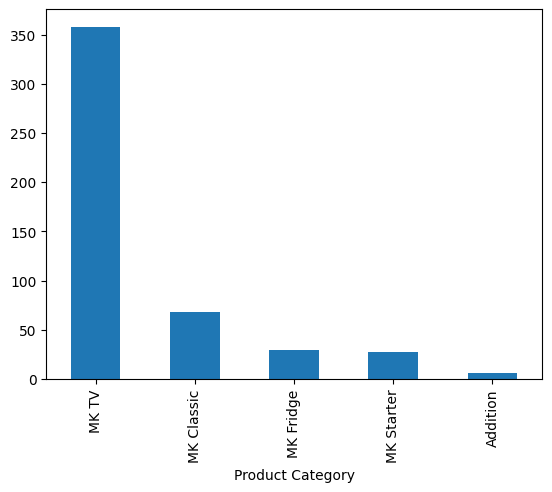

In [18]:
pdt_cat.plot(kind = 'bar')

In [19]:
#Count of the Top 10 unique occurrences in the Product sub category column
pdt_subCat = payment_plan['Product Sub Category'].value_counts().head(10)
pdt_subCat

Product Sub Category
M-KOPA 6000     45
M-KOPA +500     38
M-KOPA 400      38
M-KOPA 600      34
M-KOPA 4        29
M-KOPA +600     29
M-KOPA +TV      28
M-KOPA +400     23
M-KOPA 6        20
M-KOPA +6000    18
Name: count, dtype: int64

"M-KOPA 6000" is the most popular Product Sub Category

<Axes: ylabel='Product Sub Category'>

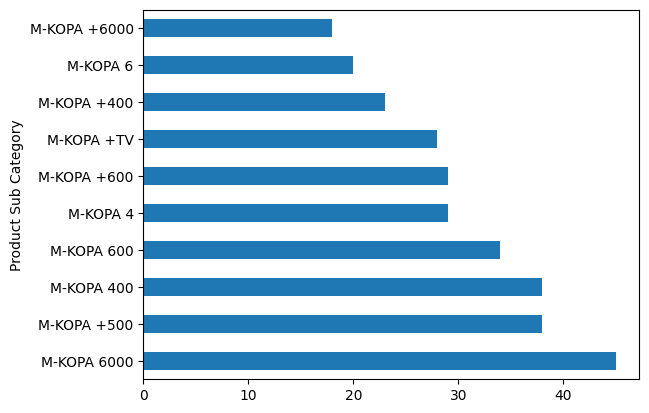

In [20]:
pdt_subCat.plot(kind = 'barh')

In [21]:
#Count of unique occurrences in the Product Type column
pdt_type = payment_plan['Product Type'].value_counts()
pdt_type

Product Type
Solar TV                344
Lights                   69
Fridge                   29
Lights - Refurbished     27
Grid TV                  14
Radio and Torch           4
Fan                       1
Name: count, dtype: int64

"Solar TV" is the most popular Product Type

<Axes: xlabel='Product Type'>

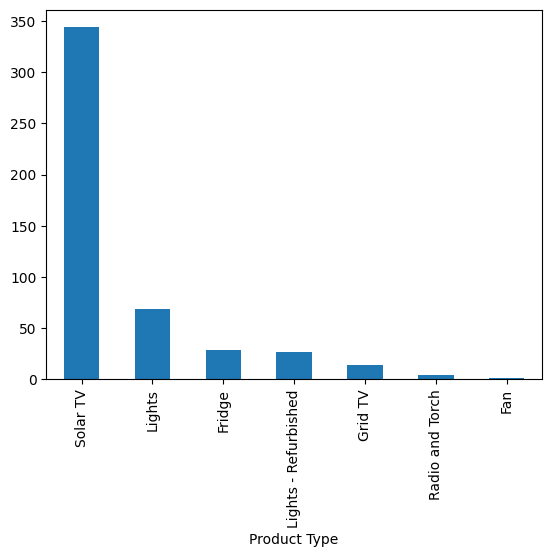

In [22]:
pdt_type.plot(kind = 'bar')

In [23]:
#Count of unique occurrences in the Plan Type column
planType = payment_plan['Plan Type'].value_counts()
planType

Plan Type
Acquisition    275
Upgrade        211
Upsell           2
Name: count, dtype: int64

"Acquisition" is the most popular Plan Type

<Axes: ylabel='Plan Type'>

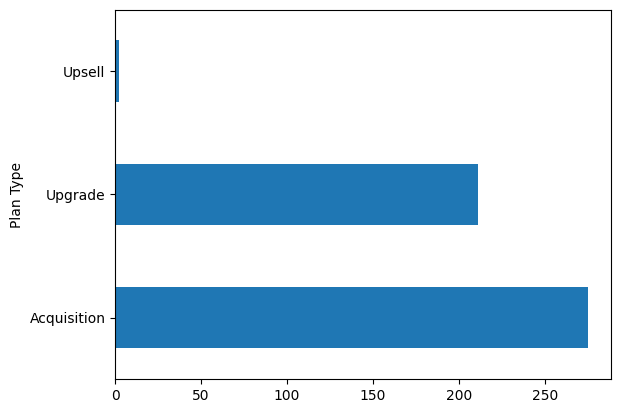

In [24]:
planType.plot(kind = 'barh')

In [25]:
#Count of unique occurrences in the Payment plan status column
paymt_planStatus_percentge = (payment_plan['Payment Plan Status'].value_counts(normalize = True)*100).round(2)
paymt_planStatus_percentge

Payment Plan Status
Closed    93.65
Active     6.15
New        0.20
Name: proportion, dtype: float64

93.65% of the Payment Plans have been closed with 6.15% still active and 0.20% new

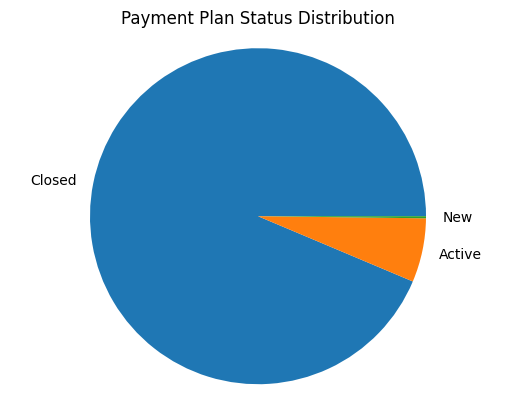

In [26]:
# Creating a pie chart
plt.pie(paymt_planStatus_percentge, labels=paymt_planStatus_percentge.index)

# Add a title
plt.title('Payment Plan Status Distribution')

# Ensure the pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()

In [27]:
#Count of unique occurrences in the Variant column
variant = payment_plan['Variant'].value_counts()
variant

Variant
24" TV         122
32" TV          95
16" TV          71
4 lights        45
22" TV          39
20" TV          31
3 lights        28
2 lights        27
100L Fridge     24
47L Fridge       5
12" Fan          1
Name: count, dtype: int64

24" TV is the most popular Variant

<Axes: ylabel='Variant'>

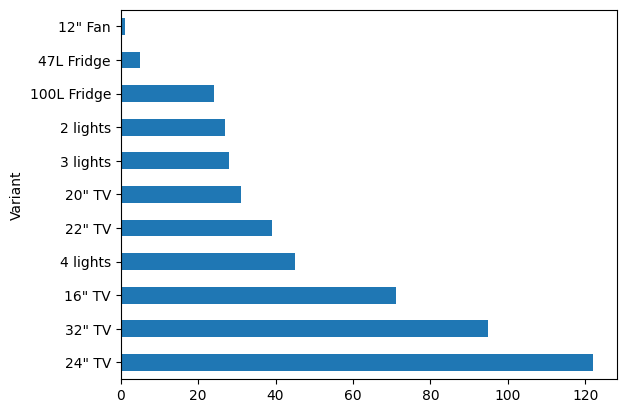

In [28]:
variant.plot(kind = 'barh')

# Answering Questions

<b>Question 1</b>
<br>
You are provided with two datasets: Payment Plan Table and Sales Table. Your task is to analyse the data and create a
dashboard that answers the following questions:
<br>

• Which Payment Plan had the highest sales in a particular month?
<br>

• What is the total revenue generated by each Product Sub Category?
<br>

• Which Product Type had the highest average daily top up?
<br>

• How does the sales trend of a particular Model change over time?
<br>

• What is the monthly revenue trend for a particular Masterbrand

# Resetting Index of the dataframe

In [29]:
# Sort the DataFrame by the 'Created At Date' column in ascending order
payment_plan = payment_plan.sort_values('Created At Date')
# Reset the index of the DataFrame
payment_plan = payment_plan.reset_index(drop=True)

In [30]:
payment_plan['Created At Date'].min(), payment_plan['Created At Date'].max()

(Timestamp('2015-09-17 00:00:00'), Timestamp('2023-04-20 00:00:00'))

<b>Data runs from 17th September 2015 to 20th April 2023</b>

In [31]:
payment_plan.head()

,Created At Date,Payment Plan Name,Product Sub Category,Product Type,Currency Name,Product Price,Deposit,Daily Top Up,Loan Duration,Total Top Ups,Brand,Masterbrand,Model,Plan Type,Product Category,Variant,Mart Payment Plan ID,Payment Plan Status
0,2015-09-17,M-KOPA 4 v1,M-KOPA 4,Lights,KES,21249,2999.0,50.0,365.0,18250.0,M-KOPA,Solar,M-KOPA 4,Acquisition,MK Classic,3 lights,87,Closed
1,2015-12-01,M-KOPA 4 v2,M-KOPA 4,Lights,KES,21750,3500.0,50.0,365.0,18250.0,M-KOPA,Solar,M-KOPA 4,Acquisition,MK Classic,3 lights,91,Closed
2,2015-12-01,M-KOPA 4 Cash v1,M-KOPA 4,Lights,KES,17750,0.0,0.0,0.0,0.0,M-KOPA,Solar,M-KOPA 4,Acquisition,MK Classic,3 lights,90,Closed
3,2015-12-04,M-KOPA 4 Demo,M-KOPA 4,Lights,KES,15750,750.0,25.0,600.0,15000.0,M-KOPA,Solar,M-KOPA 4,Acquisition,MK Classic,3 lights,92,Closed
4,2015-12-04,M-KOPA 4 Staff,M-KOPA 4,Lights,KES,15275,2500.0,35.0,365.0,12775.0,M-KOPA,Solar,M-KOPA 4,Acquisition,MK Classic,3 lights,93,Active


<b>Which Payment Plan had the highest sales in a particular month?</b>

In [32]:
# Extracting the Month and Year from the dataframe
payment_plan['Month'] = payment_plan['Created At Date'].dt.strftime('%b')
payment_plan['Year'] = payment_plan['Created At Date'].dt.year

In [33]:
#Checking Unique occurrences for each Month
payment_plan['Month'].value_counts()

Month
Aug    82
Jul    60
May    45
Mar    43
Feb    38
Apr    38
Jun    38
Sep    33
Jan    33
Oct    27
Dec    26
Nov    25
Name: count, dtype: int64

Chosing <b>April</b> as my Particular Month 

In [34]:
# Filtering the data for the particular month
april_filtered_data = payment_plan[payment_plan['Month'] == 'Apr']

# Grouping by Payment Plan Name and calculate the total price
sales_by_plan = april_filtered_data.groupby('Payment Plan Name')['Total Top Ups'].sum().sort_values(ascending = False)
sales_by_plan

Payment Plan Name
M-KOPA FRIDGE v4 100L                          92500.0
M-KOPA 6000 (32") v9 MD LR (BURN)              86400.0
MK 6000C 32" TV v3 Staff                       80000.0
M-KOPA 600 (24") Zuku Smart CAM v4 (BURN)      79650.0
M-KOPA 6000 (32") v8 HD LR (BURN)              79650.0
M-KOPA +500 (22") Zuku Smart CAM v1            72000.0
MK 600 24" TV v21 Staff                        61200.0
M-KOPA 600 (24")-Rev B v7                      60000.0
M-KOPA 600 (24") v3 (BURN)                     59000.0
M-KOPA +600 (24") v10 (Early Upgrade)          54000.0
M-KOPA +600 (24") v11 (GT Early Upgrade)       54000.0
M-KOPA 400 (3B) Telesales v1-1                 45625.0
M-KOPA 400 v2                                  45625.0
M-KOPA 400 (3B) IndCh v1                       45625.0
M-KOPA 400 (3B) Telesales v1                   45625.0
M-KOPA +500 (22") v3 (GT)                      45000.0
M-KOPA + TV (22") v3 (GT)                      45000.0
M-KOPA +500 (22") v7 (RT 3000 Deposit)         

In [35]:
#Payment Plan with the highest sales
highest_sales_by_plan = sales_by_plan.idxmax()
print("Payment Plan with the highest sales in April is:", highest_sales_by_plan)

Payment Plan with the highest sales in April is: M-KOPA FRIDGE v4 100L


Chosing <b>August</b> as my Particular Month 

In [36]:
# Filtering the data for the particular month
august_filtered_data = payment_plan[payment_plan['Month'] == 'Aug']

# Groupig by Payment Plan Name and calculating the total price
sales_by_plan = august_filtered_data.groupby('Payment Plan Name')['Total Top Ups'].sum().sort_values(ascending = False)
sales_by_plan

Payment Plan Name
MK 60K (80W Panel) 32"TV & Fridge v4    175000.0
M-KOPA Fridge v14 100L                  120000.0
MK Fridge v20 100L                      115500.0
M-KOPA Fridge v18 100L                  115500.0
M-KOPA Fridge v19 100L                  115500.0
                                          ...   
M-KOPA 4S Upgrade Pack v2                 8500.0
 M-K5 PVT F&F                             7300.0
MK 6 Cash v8                                 1.0
M-KOPA Fridge (CASH) v13 100L                0.0
M-KOPA 400 IndCh Cash v1                     0.0
Name: Total Top Ups, Length: 82, dtype: float64

In [37]:
#Payment Plan with the highest sales
highest_sales_by_plan = sales_by_plan.idxmax()
print("Payment Plan with the highest sales in August is:", highest_sales_by_plan)

Payment Plan with the highest sales in August is: MK 60K (80W Panel) 32"TV & Fridge v4


<b>What is the total revenue generated by each Product Sub Category?</b>

In [38]:
# Group by Product Sub Category and calculate the total revenue
revenue_by_subcategory = payment_plan.groupby('Product Sub Category')['Total Top Ups'].sum().sort_values(ascending = False)
revenue_by_subcategory

Product Sub Category
M-KOPA 6000             3758800.0
M-KOPA 600              2111200.0
M-KOPA +500             1662626.0
M-KOPA +600             1527200.0
M-KOPA 400              1508150.0
M-KOPA +6000            1425000.0
M-KOPA +TV              1215500.0
M-KOPA Fridge 100L      1188500.0
M-KOPA +Fridge 100L     1111500.0
M-KOPA 6000 Zuku        1082900.0
M-KOPA 400 Zuku          980925.0
M-KOPA +400              911500.0
M-KOPA +600 Zuku         757200.0
M-KOPA 600 Zuku          707550.0
M-KOPA 500               657450.0
M-KOPA +6000 Zuku        606000.0
M-KOPA +500 Zuku         562500.0
M-KOPA 60000             525000.0
M-KOPA +400 Zuku         464451.0
M-KOPA 6000 Grid         461001.0
M-KOPA 4                 450525.0
M-KOPA 6                 368751.0
M-KOPA 500 Zuku          330350.0
M-KOPA +Fridge 47L       290000.0
M-KOPA 5                 245300.0
M-KOPA 600 Grid          195500.0
M-KOPA Fridge 47L        183000.0
M-KOPA +6000 Grid        139500.0
M-KOPA 4 Starter         13

<b>Which Product Type had the highest average daily top up?</b>

In [39]:
# Group by Product Type and calculate the average daily top up
avg_topup_by_type = payment_plan.groupby('Product Type')['Daily Top Up'].mean().sort_values(ascending = False)
avg_topup_by_type

Product Type
Fridge                  127.275862
Grid TV                 101.500000
Solar TV                 97.389535
Lights - Refurbished     44.814815
Lights                   43.565217
Radio and Torch          38.870000
Fan                       5.000000
Name: Daily Top Up, dtype: float64

In [40]:
# Find the Product Type with the highest average daily top up
highest_avg_topup_type = avg_topup_by_type.idxmax()
print("Product Type with the highest average daily top up is:", highest_avg_topup_type)

Product Type with the highest average daily top up is: Fridge


<b>How does the sales trend of a particular Model change over time?</b>

In [41]:
#Checking for unique Models available in the Model Column
payment_plan['Model'].value_counts().head()

Model
M-KOPA 6000    45
M-KOPA 400     38
M-KOPA +500    38
M-KOPA 600     34
M-KOPA 4       29
Name: count, dtype: int64

<b>Chosing "M-KOPA 6000" as my Particular Model</b>

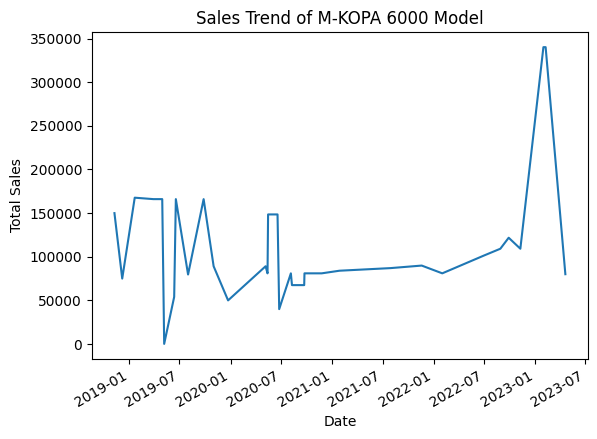

In [42]:
#Filtering the data for a particular model
particular_model = payment_plan[payment_plan['Model'] == 'M-KOPA 6000']

# Grouping the data by the 'Created At Date' which is the date column and calculating the sum of total top-ups
sales_trend = particular_model.groupby('Created At Date')['Total Top Ups'].sum()

# Plot the sales trend
sales_trend.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend of M-KOPA 6000 Model')
plt.show()

<b> What is the monthly revenue trend for a particular Masterbrand</b>

In [43]:
payment_plan['Masterbrand'].value_counts()

Masterbrand
Solar    488
Name: count, dtype: int64

We have one master brand "Solar"

In [44]:
#Filtering the data for a particular Brand
particular_brand = payment_plan[payment_plan['Masterbrand'] == 'Solar']

# Grouping the data by the 'Month' column and calculating the sum of total top-ups
monthly_revenue_trend = particular_brand.groupby('Month')['Total Top Ups'].sum()
monthly_revenue_trend

Month
Apr    1701200.0
Aug    4224501.0
Dec     948900.0
Feb    2192475.0
Jan    1717427.0
Jul    3333375.0
Jun    2379400.0
Mar    2255475.0
May    1962575.0
Nov    1648300.0
Oct    1446001.0
Sep    2117100.0
Name: Total Top Ups, dtype: float64

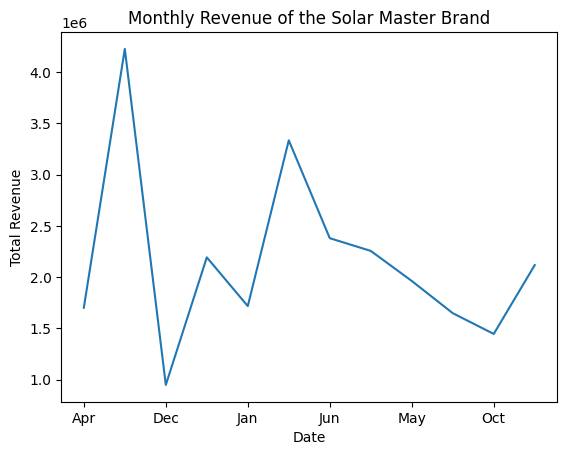

In [45]:
# Plot the sales trend
monthly_revenue_trend.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue of the Solar Master Brand')
plt.show()

In [46]:
# Export the clean DataFrame to Excel for Dashboard Design
payment_plan.to_excel('Clean Payment Plan.xlsx', index=False)